# Erreurs et stabilité

## Importation de packages pour Python

On commence par importer les packages mathématiques de Python suivant: Math, Numpy et Matplotlib.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

## Première partie : Erreurs d'arrondi

### Calcul de l'erreur d'arrondi de Python

Conformément au cours, on appelle unité d'arrondi le nombre $u$ égale à la moitié de l'écart
entre 1 et le plus petit nombre plus grand que $1$ représenté dans l'arithmétique utilisée. Nous
allons calculer les unités d'arrondi du logiciel Python, sachant que la base utilisée pour la
représentation des nombres est la base 2, on calculera l'unité d'arrondi au moyen de la boucle
suivante
```python
x = 1
y = 1 + x
compteur=0
Tant que y != 1
    x = x/2
    y = 1 + x
    compteur=compteur+1
Fin
imprimer(x,compteur)
```

>**A faire :** Implémenter cette boucle dans la boucle de code du dessous et calculer l'erreur d'arrondi de Python.

In [2]:
x = 1
y = 1 + x
compteur = 0
while y!= 1 : 
    x = x/2
    y = 1 + x
    compteur += 1
print(x, compteur)

1.1102230246251565e-16 53


Vous devez trouver un résultat cohérent avec le codage 64 bits des nombres en virgule flottante. Le premier bit est le signe du nombre, les 11 bits suivants sont la puissance (la place de la virgule) et les 52 derniers sont la précision.  

### Modification de l'erreur d'arrondi de Python

Nous voulons maintenant forcer l'ordinateur à effectuer des calculs avec moins de chiffre
de mantisse. Nous allons pour cela utiliser la fonction $(a , b) =\textrm{np.frexp}(x)$ qui rend $a\in[0,5; 1[$ et
$b\in\mathbb{Z}$ tels que $x = a \times 2^{b}$.
Le nombre de chiffres significatifs de $x$ correspond donc au nombre de chiffres significatifs de $a$. En notant $E$ la fonction partie entière et $c = 2^{-n}E(a\times 2^{n})$, le
nombre $c$ est égal au nombre $a$ à $n$ chiffres significatifs près (en base $2$).
Ainsi $\tilde{x} = c \times 2^{b}$ est égal à $x$ à $n$ chiffres significatifs près (en base $2$).

>**A faire :** Implémenter la fonction $\textrm{arrondi}(x)$ qui rend $\tilde{x}$, une valeur approchée de $x$ à $30$ chiffres significatifs près (en base $2$). Pour pouvoir utiliser la fonction arrondi dans le reste du TP, on fera attention au fait que $x$ puisse être un tableau de numpy. Poser x=[0.1,1] et calculer l'erreur entre x et arrondi(x). 

In [4]:
def arrondi(x):
    (a, b) = np.frexp(x)
    n = 30
    c = np.power(2., -n)*np.floor(a*np.power(2., n))
    return c*np.power(2., b)
x=np.array([0.1,1])
print(arrondi(x))

[0.1 1. ]


>**A faire :** Reprendre la boucle précédente (où vous avez calculé l'erreur d'arrondi de Python) et calculer la nouvelle erreur d'arrondi. Vous devez trouver 30 !!

In [5]:
x = 1
y = 1 + x
compteur = 0
while y!= 1 : 
    x = x/2
    y = arrondi(1 + x)
    compteur += 1
print(x, compteur)

9.313225746154785e-10 30


### Calculs de dérivées numériques

On peut calculer une dérivée de façon approchée en utilisant la formule 

\begin{equation*}
D_h(x) = \frac{f(x+h)-f(x)}{h} = f'(x) + f''(\eta)\frac h 2. \quad\quad\quad (1.1)
\end{equation*}

Les $D_h(x)$ fournissent une approximation de $f'(x)$ dont la qualité augmente *a priori* lorsque $h$ décroît.

>**A faire :** Créer une fonction python ```calculderivee()``` qui calcule les valeurs approchées de la dérivée de la fonction $f(x) = \sin(3x)$ au point $x=1$ avec les pas $h_k = 10^{-k}$, $1\leq k\leq 10$. Cette fonction rendra deux vecteurs [err1,err2], le vecteur err1 est le calcul de l'erreur entre la dérivée approchée et la vraie dérivée sans la fonction $\textrm{arrondi}$ et le vecteur err2 est le calcul d'erreur avec la fonction $\textrm{arrondi}$.

>**A faire :** On affichera le log des erreurs calculées avec la librairie matplotlib.

(array([1.86795322e-02, 5.90444752e-03, 6.30584595e-04, 6.34594553e-05,
        6.34997487e-06, 6.34577266e-07, 6.29789421e-08, 1.19611121e-08,
        2.46165741e-07, 3.84943619e-07]),
 array([1.86795216e-02, 5.90437980e-03, 6.25576837e-04, 5.90958281e-05,
        3.85608169e-04, 4.87924065e-03, 3.86396847e-02, 1.99292829e-01,
        2.96997749e+00, 2.96997749e+00]))

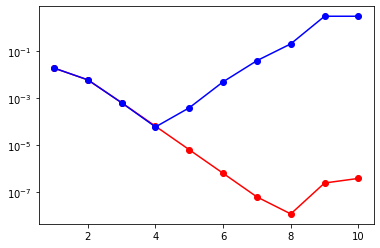

In [5]:
def calculderivee():
    k = np.linspace(1, 10, 10)
    h = 10.**(-k)
    Dh = (np.sin(3*(1+h))-np.sin(3))/h
    Dh_arr = (arrondi(np.sin(3*arrondi(1+h)))-arrondi(np.sin(3)))/arrondi(h)
    Dev = 3*np.cos(3)
    err1 = abs(Dh-Dev)
    err2 = abs(Dh_arr-Dev)
    plt.semilogy(k, err1, '-or', label= "courbe 1")
    plt.semilogy(k, err2, '-ob', label= "courbe 2")
    return (err1, err2)
calculderivee()

On peut interpréter le comportement des erreurs calculées en remplaçant l'estimation déduite de $(1.1)$ par:

\begin{equation*}|D_h(1)-f'(1)|\leq \frac h 2 |f''(\eta)| + \frac {2u_f}h. \quad\quad\quad (1.2)
\end{equation*}

où $u_f$ est l'erreur d'arrondi et où on approxime $|f''(\eta)|\approx 9\sin(3)$.

>**A faire :** Calculer les valeurs pour les différents pas du membre de droite de $(1.2)$. Afficher les courbes log du calcul de l'erreur effectué à la question précédente et de l'estimation théorique donnée par $(1.2)$. Montrez que l'estimation théorique donne un résultat honorable.

(array([6.35040223e-02, 6.35058663e-03, 6.36902681e-04, 8.21304551e-05,
        1.92614915e-04, 1.86328019e-03, 1.86265150e-02, 1.86264521e-01,
        1.86264515e+00, 1.86264515e+01]),
 array([1.86795322e-02, 5.90444752e-03, 6.30584595e-04, 6.34594553e-05,
        6.34997487e-06, 6.34577266e-07, 6.29789421e-08, 1.19611121e-08,
        2.46165741e-07, 3.84943619e-07]),
 array([1.86795216e-02, 5.90437980e-03, 6.25576837e-04, 5.90958281e-05,
        3.85608169e-04, 4.87924065e-03, 3.86396847e-02, 1.99292829e-01,
        2.96997749e+00, 2.96997749e+00]))

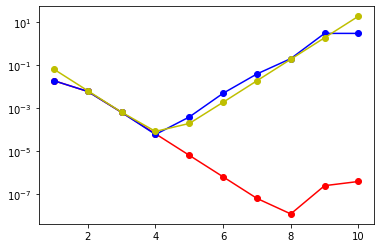

In [6]:
def calculderivee():
    k = np.linspace(1, 10, 10)
    h = 10**(-k)
    uf = 9.313225746154785e-10 
    H = (h/2.)*abs(9*np.sin(3))+(2*uf)/h
    Dh = (np.sin(3*(1+h))-np.sin(3))/h
    Dh_arr = (arrondi(np.sin(3*arrondi(1+h)))-arrondi(np.sin(3)))/arrondi(h)
    Dev = 3*np.cos(3)
    err1 = abs(Dh-Dev)
    err2 = abs(Dh_arr-Dev)
    plt.semilogy(k, err1, '-or', label= "courbe 1")
    plt.semilogy(k, err2, '-ob', label= "courbe 2")
    plt.semilogy(k, H, '-oy', label= "courbe 3")
    return H,err1,err2
calculderivee()

## Deuxième partie : Calcul d'intégrales

On va s'intéresser au calcul des intégrales

\begin{equation*}
I_k = \int_0^1 \frac{x^k}{20+9x+x^2}dx.
\end{equation*}

On rappelle que vous avez démontré en travaux dirigés que les $I_k$ vérifient la relation

\begin{equation*}
I_{k+1} = \frac 1 k - 9I_k-20 I_{k-1}. \quad\quad\quad (1.3)
\end{equation*}

Vous avez également établi que, pour $k\geq 2$, on a

\begin{equation*}
\frac{1}{30(k+1)} \leq I_k \leq \frac{1}{20(k+1)}. \quad\quad\quad (1.4)
\end{equation*}

> **A faire :** <ol>
> <li>Calculer les $I_k$ pour $0\leq k \leq 10$, en utilisant la relation $(1.3)$ initialisée par:

>\begin{equation*}\left\{\begin{array}{ll}
I_0 = \ln(25/24),
\\ I_1 = 4\ln(4) - 9\ln(5)+5\ln(6).
\end{array}\right.\end{equation*}
</li>

><li>Calculer $I_{30}$. Vérifiez-vous les bornes $(1.4)$ ?</li>

</ol>

In [7]:
def IntegralCalcUp(k):
    I0 = np.log(25/24)
    I1 = 4*np.log(4)-9*np.log(5)+5*np.log(6)
    I = [I0, I1]
    for i in range(2, k) : 
        I = I+[1/(i-1)-9*I[i-1]-20*I[i-2]]
    print(I[k-1])
    if I[k-1]<=(1/(20*(k+1))) and I[k-1]>= 1/(30*(k+1)) : 
        print("Les bornes sont respectées pour ", k-1)
    else : 
        print("Les bornes ne sont pas respectées pour ", k-1)
IntegralCalcUp(31)

-45910.45139602745
Les bornes ne sont pas respectées pour  30


On inverse la relation de récurrence $(1.3)$ pour écrire la relation

\begin{equation*}
I_{k-1} = \frac{1}{20k} - \frac 9 {20} I_k - \frac 1 {20} I_{k+1}
\end{equation*}
> **A faire :** Ecrire un programme $\textrm{IntegralCalcDown(k,m)}$ avec $k\le m-1$ implémentant la nouvelle relation de récurrence en partant de $I_m=\frac{1}{20(m+1)}$ et $I_{m-1}=\frac{1}{20(m)}$ qui calcule $I_k$.

In [9]:
def IntegralCalcDown(k,m):
    Im = 1/(20*(m+1))
    Im1 = 1/(20*m)
    I = [Im, Im1]
    for i in range(2, m-k) :
        I = I + [(1/(20*(i+1)))-(9/20)*I[i-1]-(1/20)*I[i-2]]
    return I[k-1]
IntegralCalcUp(15)
print (IntegralCalcDown(15,30))
print (IntegralCalcDown(15,1000))




0.0022746019856508953
Les bornes sont respectées pour  14
0.002166351186357876
0.002166351323520882


Comparer la valeur de $\textrm{IntegralCalcDown(0,100)}$ et la valeur donnée de $I_0$

In [10]:
print(np.log(25/24))
print(IntegralCalcDown(0,100))

0.0408219945202552
0.0003321056609045895
